Ce qu'on pourrait faire:
* PCA pour réduire la dimension des données, passer en dimension 2 pour pouvoir plot les données pour voir à quoi ça ressemble
* Utiliser du deep learning, cross validation pour choisir les paramètres (à voir dans le tp pour savoir comment faire je pense)
* Apparement K-nearest neighbors ça marche bien mais vu qu'on l'a pas fait en cours je sais pas si c'est une bonne idée de le faire
* utiliser les fonctions du tp d'avant pour représenter les images et voir ce que nos modèles prédises, pour voir si nos modèles sont pas mal ou s'ils trompent souvent

In [48]:
%config InlineBackend.figure_formats = ['retina']
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Load data

In [12]:
X_ant = np.load('./data/G_21_ant.npy')
X_grapes = np.load('./data/G_21_grapes.npy')

In [13]:
X_test = np.load('./data/test_images.npy')
y_test = np.load('./data/test_labels.npy')

Les data sets représentent des images dessinées en noir et blanc. Ils contiennent chacun $1000$ lignes et $784$ colonnes : $(1000, 784)$. Chaque colonne représente la couleur d'un pixel sur une échelle de gris de $0$ à $255$. Les $1000$ lignes correspondent à $1000$ images différentes. Les images ont une taille de $28\times28$, d'où les $784$ colonnes.

# Creates labels for ant and grapes

ant := label $1$ and grapes := label $-1$

In [14]:
y_ant = np.zeros((X_ant.shape[0],))
y_grapes = np.ones((X_grapes.shape[0],))

# Merge the data into one matrix

In [15]:
X_train = np.concatenate((X_ant, X_grapes), axis=0)

In [16]:
y_train = np.concatenate((y_ant, y_grapes), axis=0)

# Use SVM to separate data

## SVC with linear kernel

In [18]:
clf_lin = SVC(kernel='linear', C=1)
clf_lin.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
clf_lin.score(X_test, y_test)

0.716

## SVC with gaussian kernel

In [20]:
clf_rbf = SVC(kernel='rbf', C=1)
clf_rbf.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
clf_rbf.score(X_test, y_test)

0.869

## Use cross validation to choose the best parameters for the linear kernel (C) and for the gaussian kernel ($\gamma$ & C)

### Linear kernel

In [ ]:
clf_lin_cv = GridSearchCV(SVC(), param_grid={'C':np.logspace(-5, 5, num=20), 'kernel':['linear']})
clf_lin_cv.fit(X_train, y_train)

In [ ]:
clf_lin_cv.best_params_

In [ ]:
clf_lin_cv.cv_results_ults_['mean_test_score']

# Use perceptron to separate the data

In [22]:
clf_p = Perceptron(tol=1e-3, random_state=1)
clf_p.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
clf_p.score(X_test, y_test)

0.73

# Use PCA to reduce the dimension of the data

Before using PCA, we need to standardise the data (mean=0, variance=1)

In [27]:
# Standardise the X_train
X_s_train = StandardScaler().fit_transform(X_train)

In [31]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_s_train)

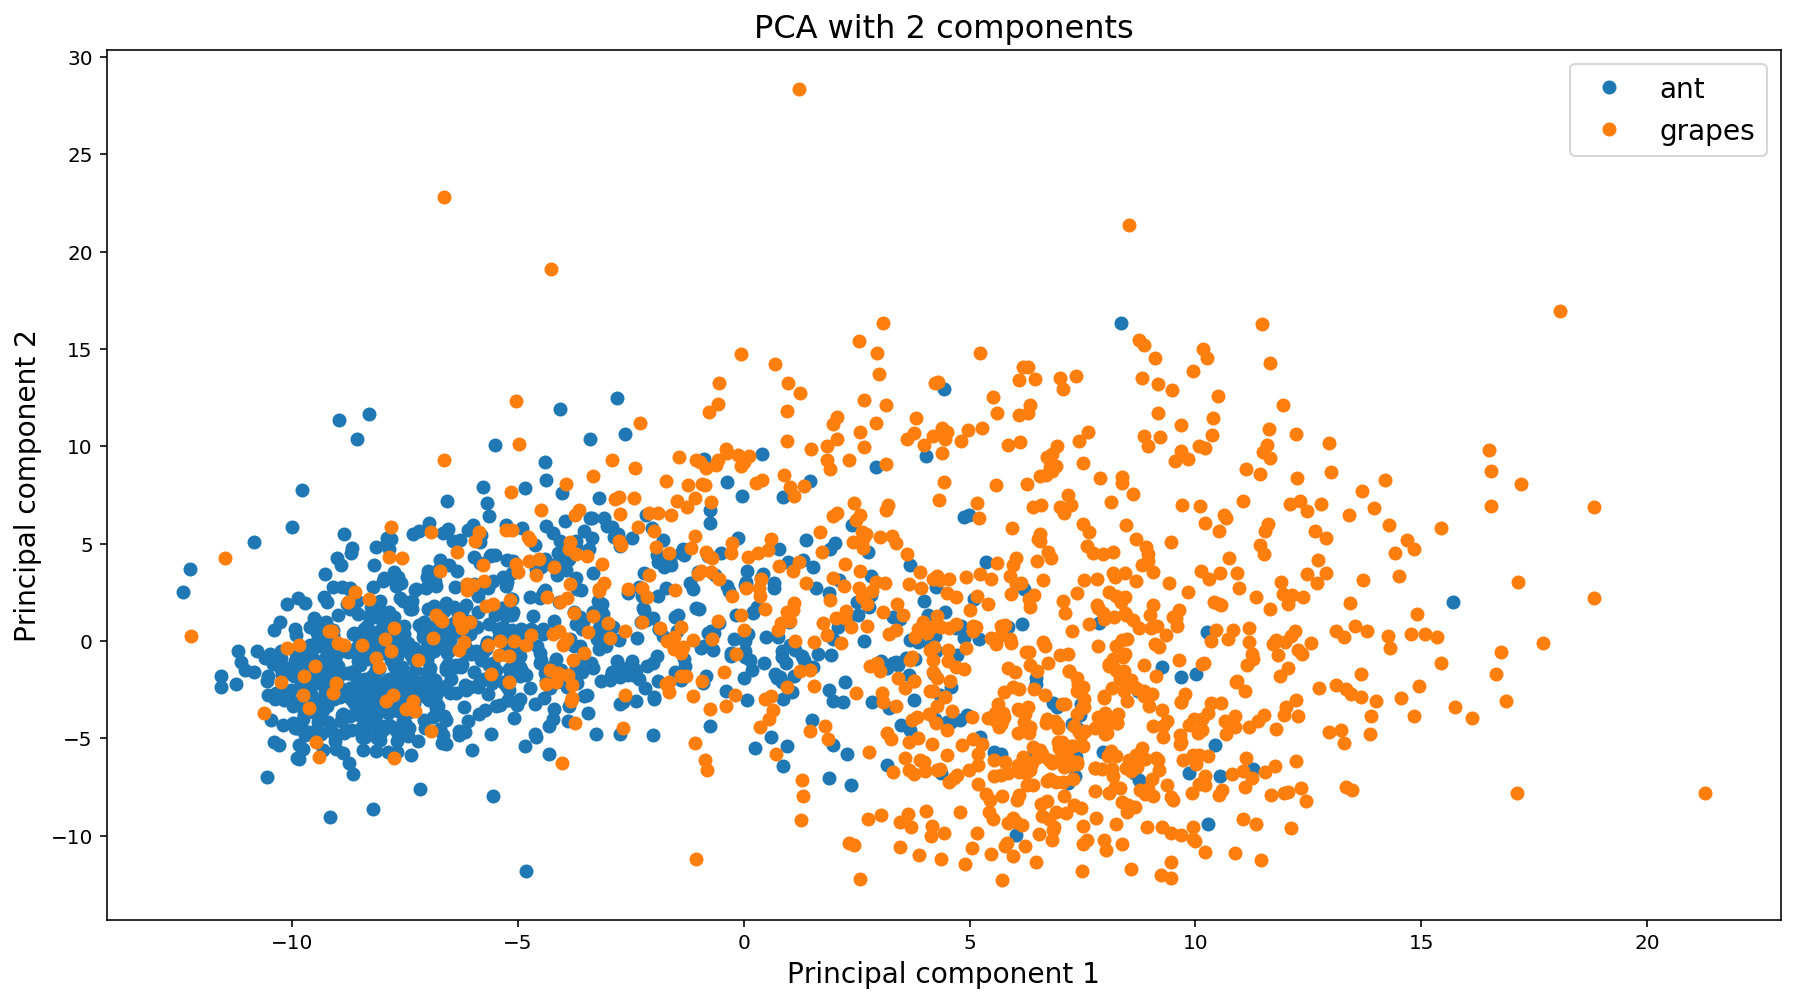

In [55]:
plt.figure(figsize=(15,8))
# plot the results in 2D to better understand the distribution of the data, plot with two different colors to see the classes
plt.plot(X_2d[:1000,0], X_2d[:1000,1], 'o', label='ant')
plt.plot(X_2d[1000:,0], X_2d[1000:,1], 'o', label='grapes')
plt.title('PCA with 2 components', size=16)
plt.xlabel('Principal component 1', size=14)
plt.ylabel('Principal component 2', size=14)
plt.legend(fontsize=14)
plt.show()

Donc les données ne semblent pas trop linéairement séparables, ce qui peut expliquer pourquoi on obtient le meilleur score avec le noyau gaussien 